In [13]:
# Emotion Recognition from Speech

## Importing Libraries
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   -------------------- ------------------- 133.1/260.1 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 260.1/260.1 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.2 kB ? eta -:--:--
   ---------------------------------------- 75.2/75.2 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.7 MB 10.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.7 MB 4.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.7 MB 4.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 4.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.7 MB 4.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 4.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.7 MB 4.9 MB/s eta 0:00:01
   ----------------

In [7]:
pip install librosa resampy tensorflow scikit-learn seaborn


  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB 32.8 kB/s eta 0:01:34
    --------------------------------------- 0.1/3.1 MB 171.1 kB/s eta 0:00:18
    --------------------------------------- 0.1/3.1 MB 171.1 kB/s eta 0:00:18
   - -------------------------------------- 0.1/3.1 MB 164.0 kB/s eta 0:00:19
   - -------------------------------------- 0.1/3.1 MB 196.9 kB/s eta 0:00:16
   - -------------------------------------- 0.1/3.1 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d3graph 2.5.0 requires markupsafe==2.0.1, but you have markupsafe 2.1.5 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install resampy



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Define the path to the dataset
dataset_path = "C:/Users/VENKATESHWARAN/Downloads/Actor_01"

In [3]:
# Initialize lists to hold the data and labels
data = []
labels = []

In [4]:
# Loop through each file in the dataset
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith('.wav'):
            # Load audio file
            file_path = os.path.join(dirname, filename)
            audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
            
            # Extract features from the audio
            mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
            
            # Append features and label to the lists
            data.append(mfccs)
            labels.append(filename.split('-')[2])  # Extract emotion label from the filename


In [5]:
# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)


In [8]:
# Data Preprocessing
# Encode the labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [7]:
# Reshape the data for CNN input
X_train = X_train[..., np.newaxis, np.newaxis]
X_test = X_test[..., np.newaxis, np.newaxis]

In [17]:

# Model Building
# Building a Convolutional Neural Network (CNN) model

model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(labels.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
A

In [18]:
# Model Training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - accuracy: 0.1771 - loss: 32.2398 - val_accuracy: 0.1667 - val_loss: 9.6342
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0972 - loss: 29.0143 - val_accuracy: 0.1667 - val_loss: 10.9674
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1840 - loss: 26.3372 - val_accuracy: 0.1667 - val_loss: 10.2933
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1250 - loss: 22.5401 - val_accuracy: 0.1667 - val_loss: 8.8639
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0868 - loss: 23.8135 - val_accuracy: 0.2500 - val_loss: 7.7713
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1389 - loss: 15.9544 - val_accuracy: 0.0833 - val_loss: 7.2287
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1493 - loss: 17.9091 - val_accuracy: 0.0833 - val_loss: 6.8352
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1389 - loss: 15.3360 - val_accuracy: 0.2500 - val_lo

In [19]:
# Model Evaluation
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2f}')


1/1 - 0s - 48ms/step - accuracy: 0.1667 - loss: 2.0747
Test Accuracy: 0.17


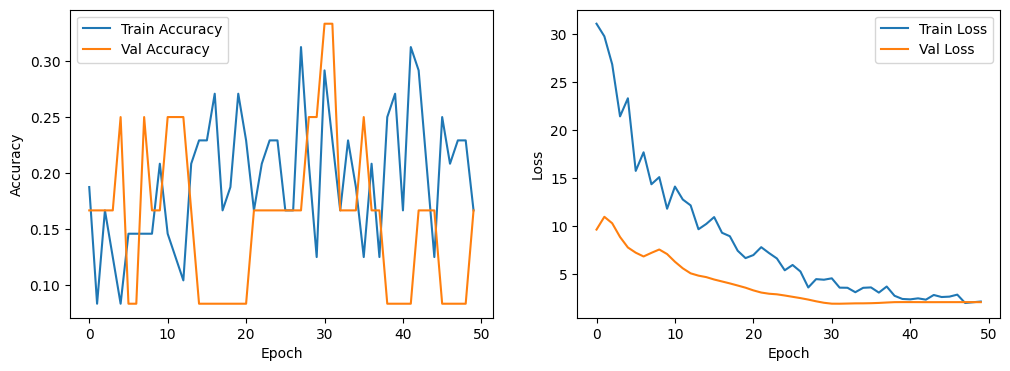

In [20]:
# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [21]:
model.save('emotion_recognition_model.h5')
print("Model saved as emotion_recognition_model.h5")

Model saved as emotion_recognition_model.h5


In [1]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model = load_model('emotion_recognition_model.h5')

# Function to extract features from an audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfccs

# Initialize lists to hold the data and labels
data = []
labels = []

# Define the path to the dataset
dataset_path = "C:/Users/VENKATESHWARAN/Downloads/Actor_01"

# Loop through each file in the dataset to get labels for encoding
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith('.wav'):
            labels.append(filename.split('-')[2])  # Extract emotion label from the filename

# Convert labels to numpy array and encode them
labels = np.array(labels)
label_encoder = LabelEncoder()
label_encoder.fit(labels)  # Fit the label encoder with the dataset labels

# Function to predict emotion from an audio file
def predict_emotion(file_path):
    features = extract_features(file_path)
    features = features[np.newaxis, ..., np.newaxis]  # Reshape for the model
    prediction = model.predict(features)
    predicted_label = np.argmax(prediction, axis=1)
    predicted_emotion = label_encoder.inverse_transform(predicted_label)
    return predicted_emotion[0]

# Test the prediction on a sample from the dataset
test_file_path = "C:/Users/VENKATESHWARAN/Downloads/Actor_01/03-01-05-02-02-02-01.wav"  # Replace with a valid path
predicted_emotion = predict_emotion(test_file_path)
print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Predicted Emotion: 06
